Compare all Hakai CTD stations, regardless of whether there is matched nutrient data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pytz
import warnings

mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

In [2]:
PATH= '/results2/SalishSea/hindcast.201905/'
#PATH= '/results2/SalishSea/hindcast/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,12,31)
flen=1
namfmt='nowcast'
filemapP={'vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}

In [3]:
datelims=(dt.datetime(2015,1,1),dt.datetime(2018,12,31))
fdata=et.loadHakai(datelims,loadCTD=True)
fdata.head()

Note: CTD depths (pZ) may vary from bottle depths (Z) by up to  1.5  m.


,NO2+NO3 (uM),PO4,SiO2,dtUTC,Station,Lat,Lon,Z,SA,CT,pZ
0,24.450401,1.916946,50.259353,2015-01-06 19:30:33,QU5,50.1183,-125.2122,0.0,25.166453,5.993519,0.930
1,25.847171,2.108350,48.122704,2015-01-06 18:30:38,QU17,50.1200,-125.1300,0.0,26.658786,6.813031,0.907
2,25.987195,2.089213,46.502461,2015-01-06 17:07:02,QU24,50.0300,-125.0800,0.0,26.583468,7.130782,0.969
3,25.611823,2.116700,48.574835,2015-01-06 19:30:33,QU5,50.1183,-125.2122,5.0,26.779254,6.880561,4.921
4,26.617488,2.136624,48.435951,2015-01-06 18:30:38,QU17,50.1200,-125.1300,5.0,26.847521,6.944894,5.014


In [4]:
fdata.keys()

Index(['NO2+NO3 (uM)', 'PO4', 'SiO2', 'dtUTC', 'Station', 'Lat', 'Lon', 'Z',
       'SA', 'CT', 'pZ'],
      dtype='object')

In [5]:
fdata['pZ']

0         0.930
1         0.907
2         0.969
3         4.921
4         5.014
         ...   
3795    148.660
3796    197.199
3797        NaN
3798      0.913
3799      3.828
Name: pZ, Length: 3800, dtype: float64

In [7]:
len(fdata.loc[(fdata['pZ']>0)&(fdata['SA']>0)])

3386

In [8]:
len(fdata.loc[(fdata['pZ']>0)|(fdata['SA']>0)])

3386

In [9]:
fdata['Z']=fdata['pZ']

In [11]:
dataHakaiPhys=et.matchData(fdata,filemapP, fdict, start_date, end_date, namfmt, PATH, flen)

In [13]:
data=dataHakaiPhys

In [15]:
data.keys()

Index(['NO2+NO3 (uM)', 'PO4', 'SiO2', 'dtUTC', 'Station', 'Lat', 'Lon', 'Z',
       'SA', 'CT', 'pZ', 'j', 'i', 'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


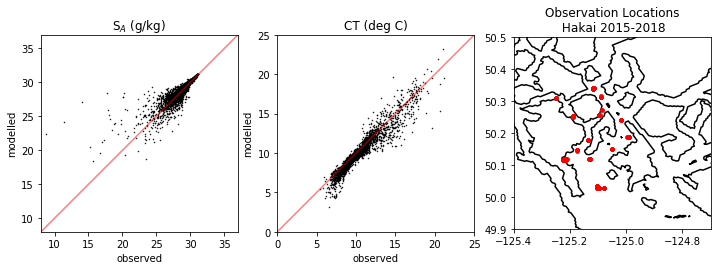

In [41]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].plot(data['SA'],data['mod_vosaline'],'k.',ms=1)
ax[0].plot((8,37),(8,37),'r-',alpha=.5)
ax[0].set_xlim(8,37)
ax[0].set_ylim(8,37)
ax[0].set_title('S$_A$ (g/kg)')
ax[0].set_xlabel('observed')
ax[0].set_ylabel('modelled')
ax[0].set_aspect(1)

ax[1].plot(data['CT'],data['mod_votemper'],'k.',ms=1)
ax[1].plot((0,25),(0,25),'r-',alpha=.5)
ax[1].set_xlim(0,25)
ax[1].set_ylim(0,25)
ax[1].set_title('CT (deg C)')
ax[1].set_xlabel('observed')
ax[1].set_ylabel('modelled')
ax[1].set_aspect(1)

ax[2].plot(data['Lon'],data['Lat'],'r.')
viz_tools.plot_coastline(ax[2],
            bathymetry='/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc',
            coords='map')
ax[2].set_xlim(-125.4,-124.7)
ax[2].set_ylim(49.9,50.5)
viz_tools.set_aspect(ax[2],coords='map')
ax[2].set_title('Observation Locations\n Hakai 2015-2018')
fig.savefig('/data/eolson/results/MEOPAR/HakaiTSEval.png',dpi=100)